In [1]:
# consts
# number of iterations:
times = 10

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import platform
import os
import multiprocessing
import datetime

%matplotlib inline

# Tester results.
### Current system:

In [3]:
print "Version:", platform.platform()
print "CPU cores:", multiprocessing.cpu_count()
print "Page size:", os.sysconf('SC_PAGE_SIZE')
print "Current time:", datetime.datetime.now()

Version: Darwin-14.5.0-x86_64-i386-64bit
CPU cores: 8
Page size: 4096
Current time: 2016-05-02 19:06:26.685549


In [4]:
data = pd.read_csv("test_result.txt", sep=' ', header=None, names=["lib", 'test', 'test_name'] + [i for i in range(times)])

In [5]:
values = [i for i in range(times)]
data["mean"] = data[values].mean(axis=1)
data["std"]  = data[values].std(axis=1)
data["testid"] = data["test"] + "_" + data["test_name"]
tests = set(data['testid'].tolist())
libs = set(data['lib'].tolist())

In [6]:
# data

## Passed and Failed tests
* GREEN - passed
* RED - failed
* YELLOW - timeout 

In [7]:
passedf = pd.DataFrame(index=libs, columns=tests).fillna(4.75)

dataslice = data[['lib', 'testid', 'mean']]
for index, row in dataslice.iterrows():
    if row["mean"] == -1:
        passedf.set_value(row['lib'], row['testid'], 0.9)
    else:
        passedf.set_value(row['lib'], row['testid'], 2.2)

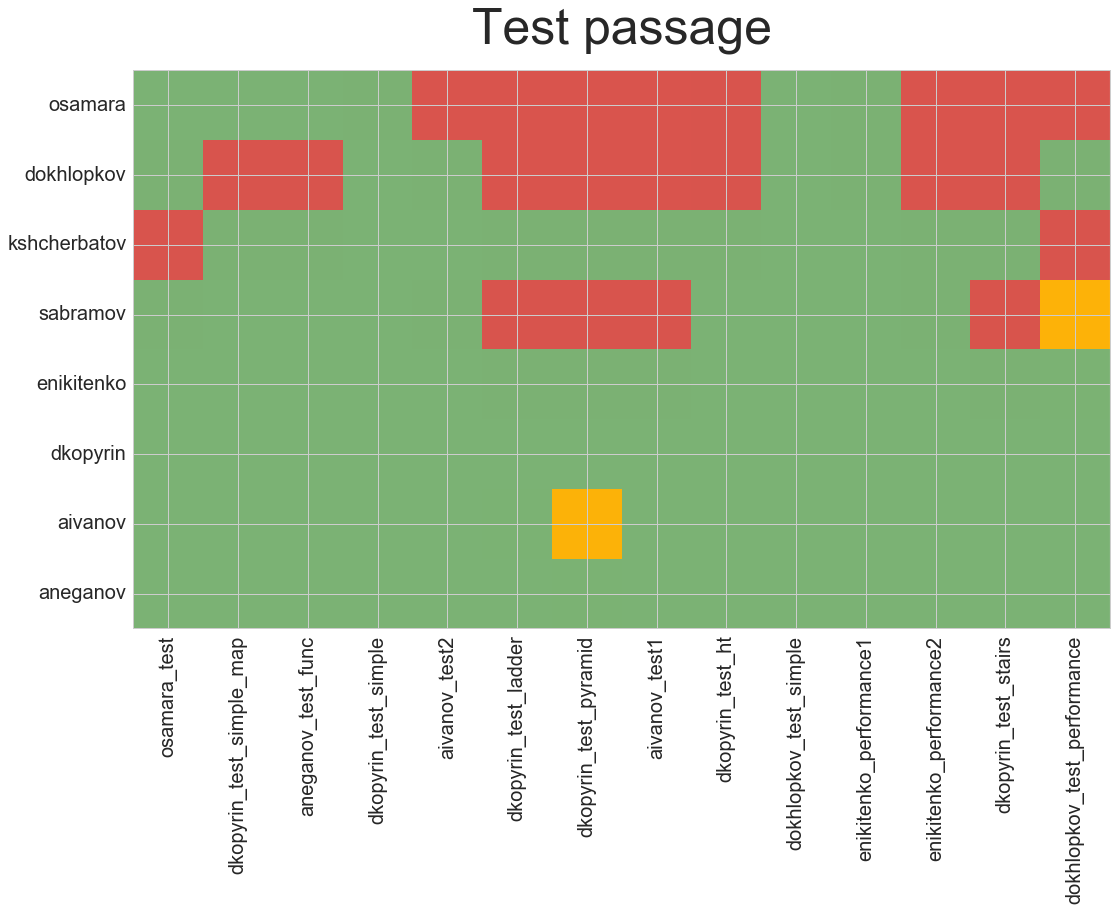

In [8]:
cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette([ "amber", "faded green", "pale red"]))

sns.set(font_scale=2)
sns.set_style("whitegrid")
row_labels = libs
col_labels = tests
plt.figure(figsize=(20,10))
plt.title("Test passage", fontsize=50,  y=1.04)
plt.imshow(passedf, interpolation='none', vmin=0, vmax=5, cmap=cmap1)
plt.xticks(range(len(tests)), col_labels, rotation=90)
plt.yticks(range(len(libs)), row_labels)
plt.show()

In [9]:
## Code to shift "Test passage" plot to left
from IPython.display import HTML
HTML("""<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('nav#menubar').hide();
  });
</script>
""")

## Rankings
1 point for being in std of the best test performer.

In [10]:
ranks = pd.DataFrame(index=libs, columns=tests).fillna(0)

datarank = data[['lib', 'testid', 'mean', 'std']]
for test in tests:
    testf = datarank[datarank.testid == test]
    best_mean = testf['mean'][testf['mean'] != -1].min()
    best_std = testf[testf['mean'] == best_mean]["std"].values[0]
    for index, row in testf.iterrows():
        curr_mean = row["mean"]
        if curr_mean != -1:
            if (np.abs(curr_mean - best_mean) <= np.abs(row['std'] + best_std)):
                ranks.set_value(row['lib'], row['testid'], 1)

In [11]:
ranks["sum"] = ranks.sum(axis=1)
ranks.sort_values(by=['sum'], ascending=False, inplace=True)

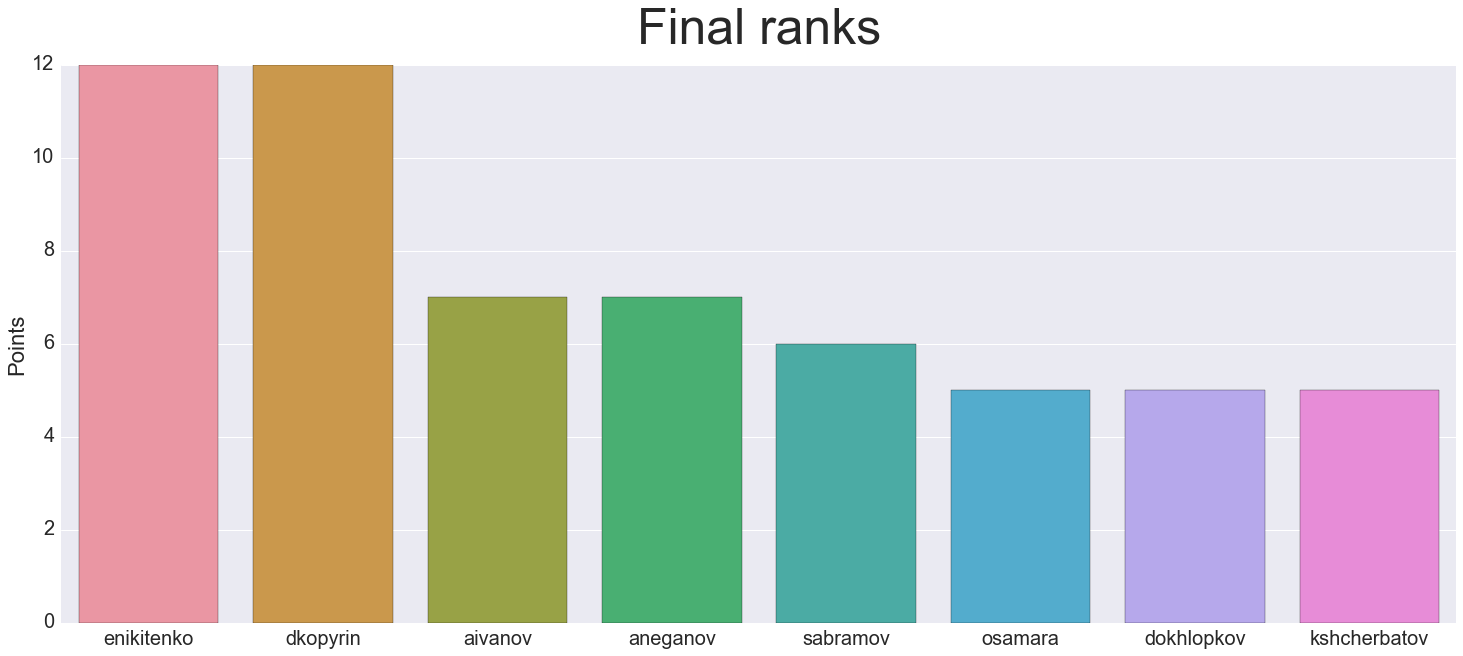

In [12]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
sns.plt.title("Final ranks", fontsize=50, y=1.03)
sns.barplot(y=ranks["sum"], x=ranks.index)
plt.ylabel('Points')
plt.show()

## Results by each test.
There are only libs that passed the test.

In [13]:
# data without timeout values.
passed_data = data[data["mean"] != -1]

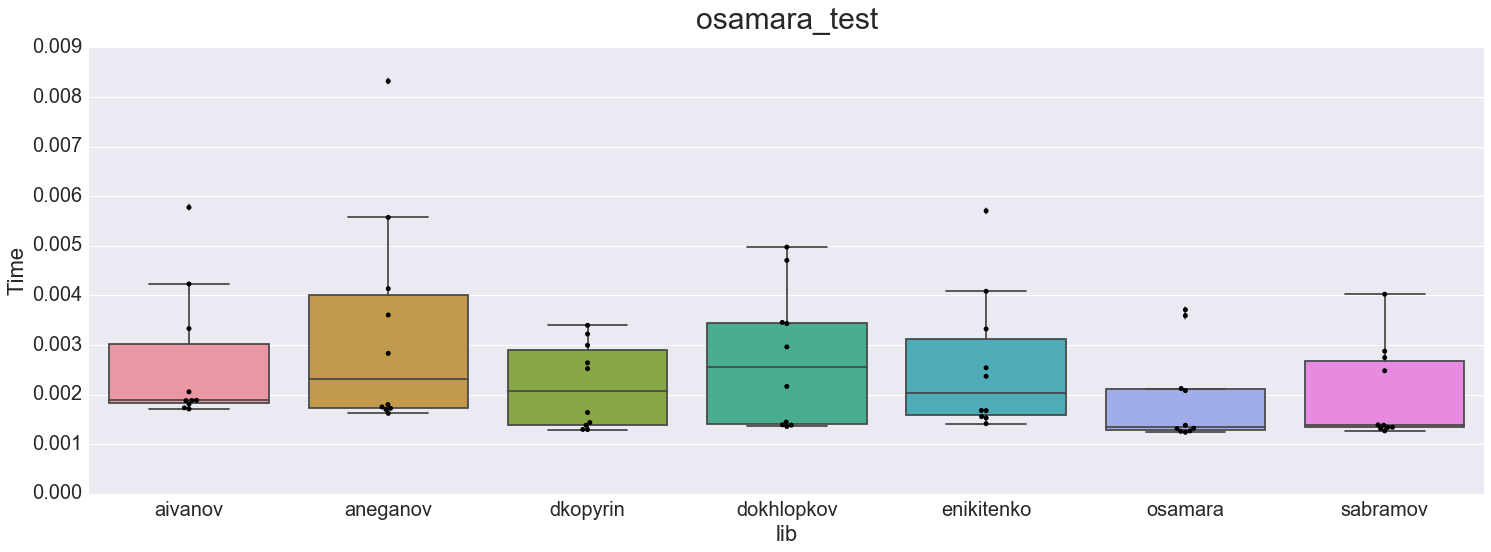

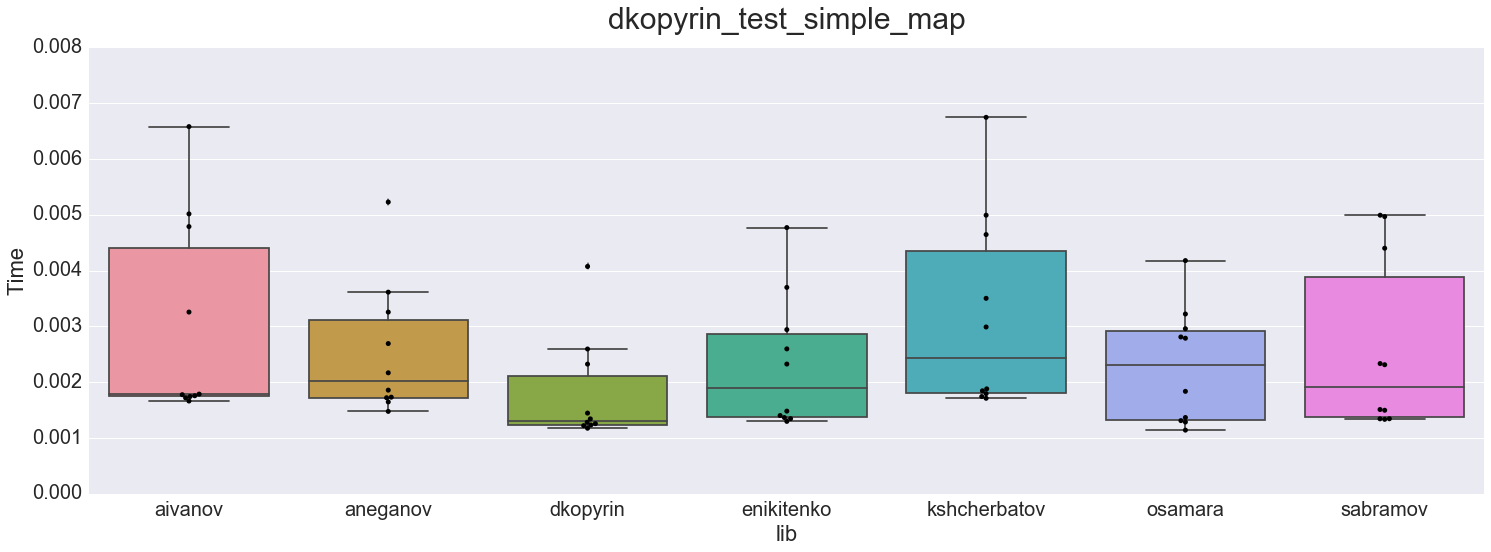

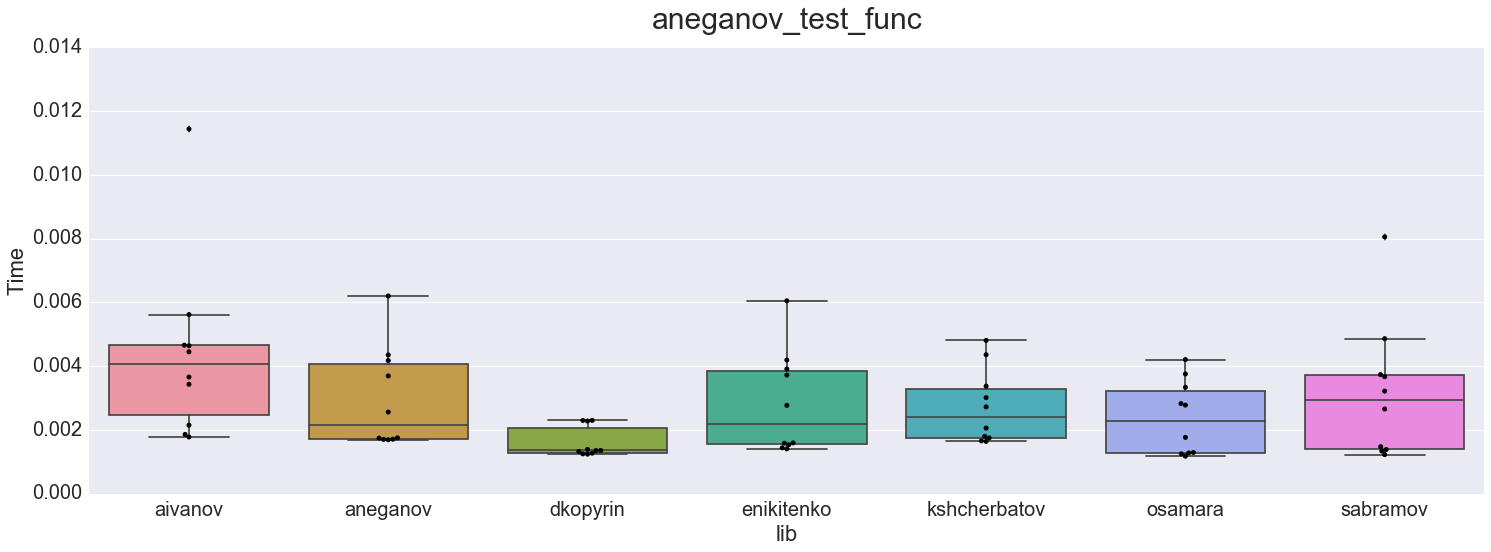

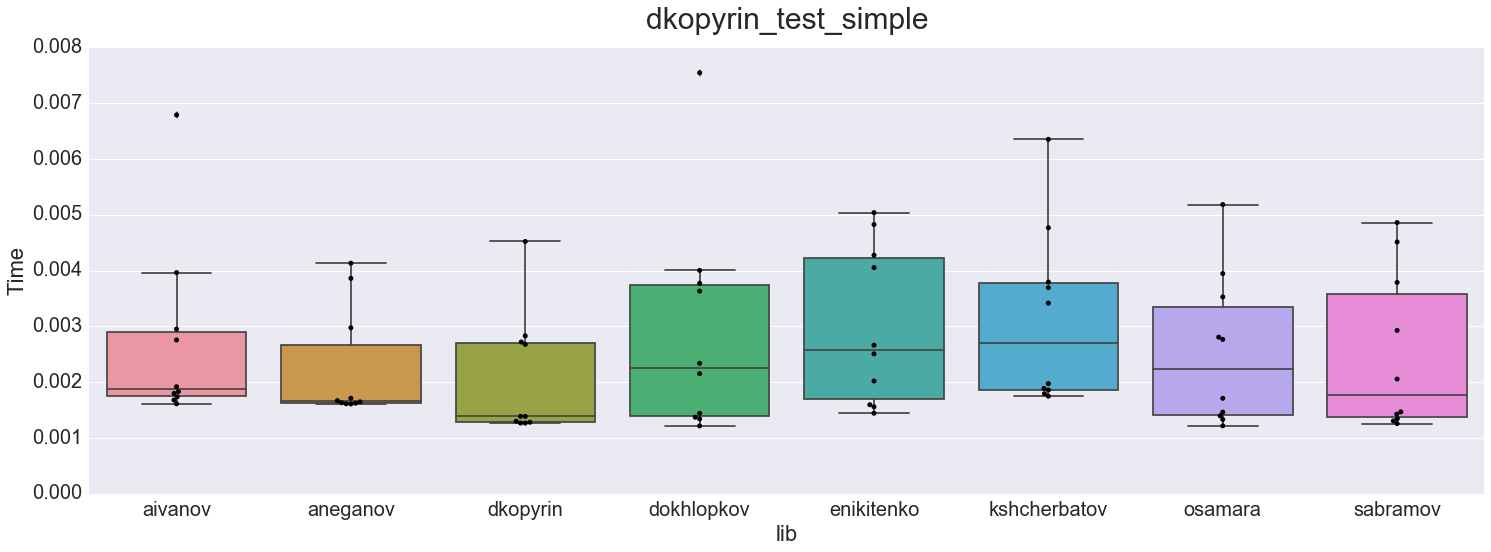

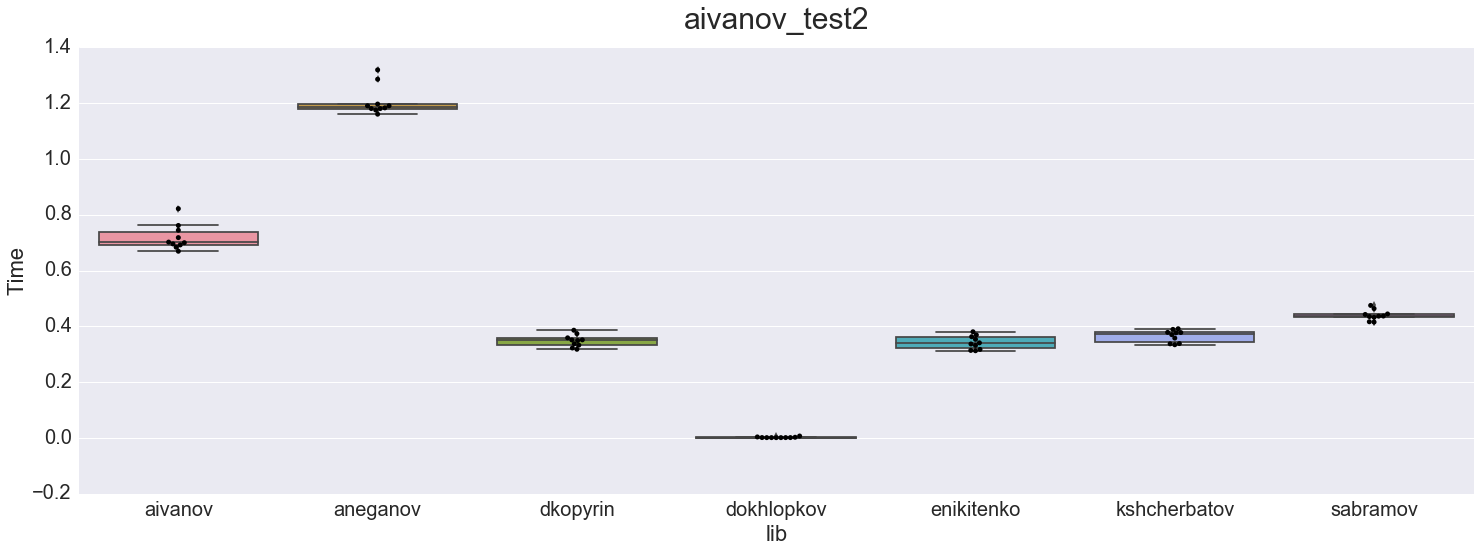

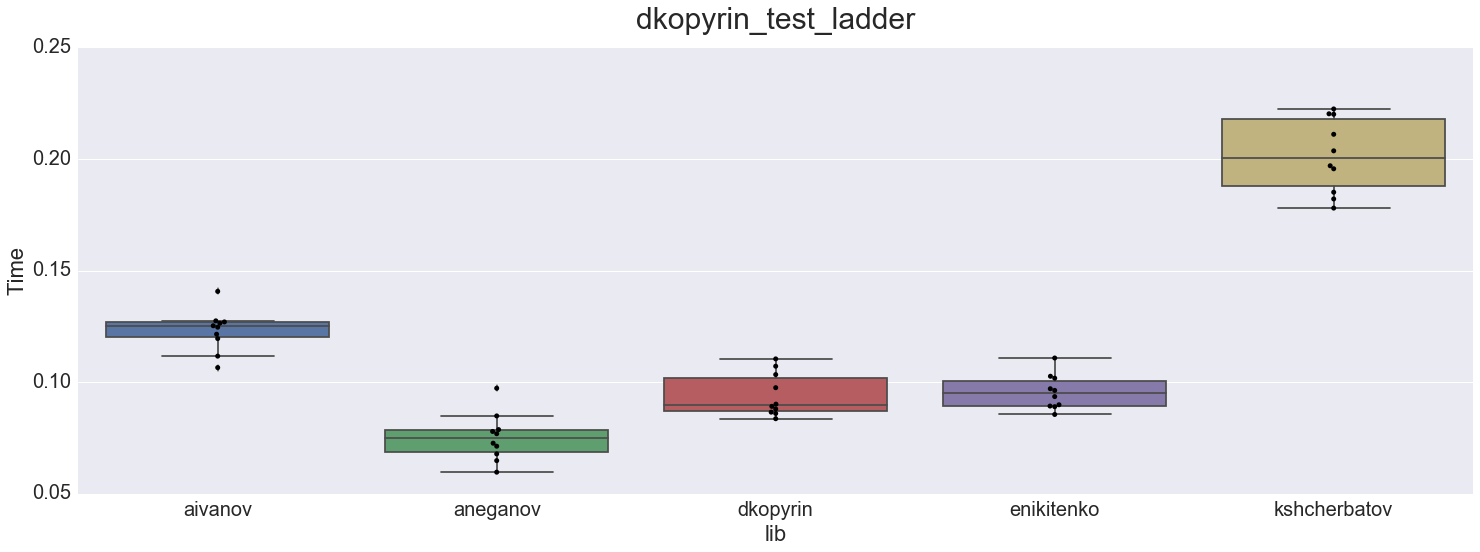

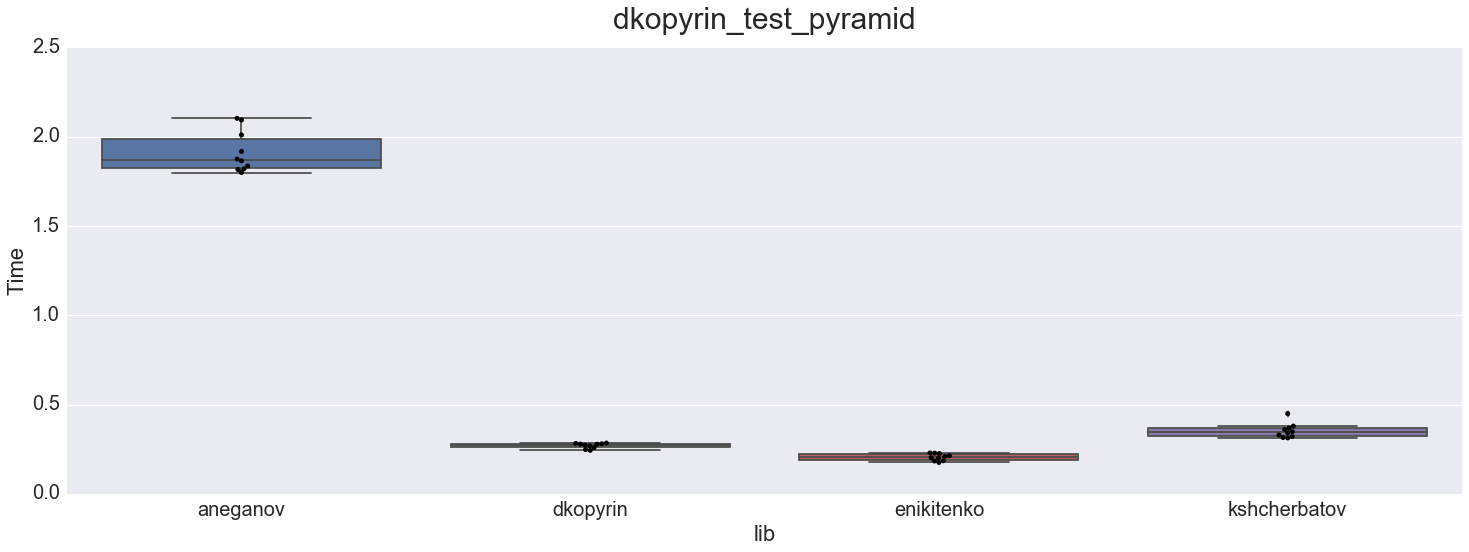

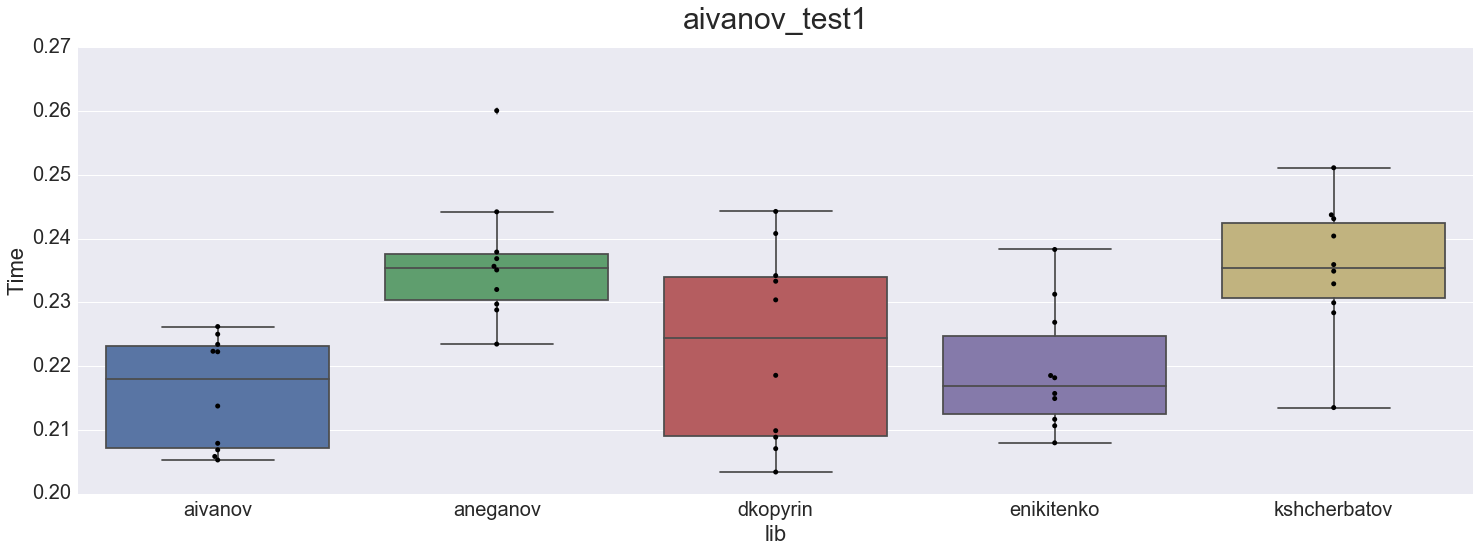

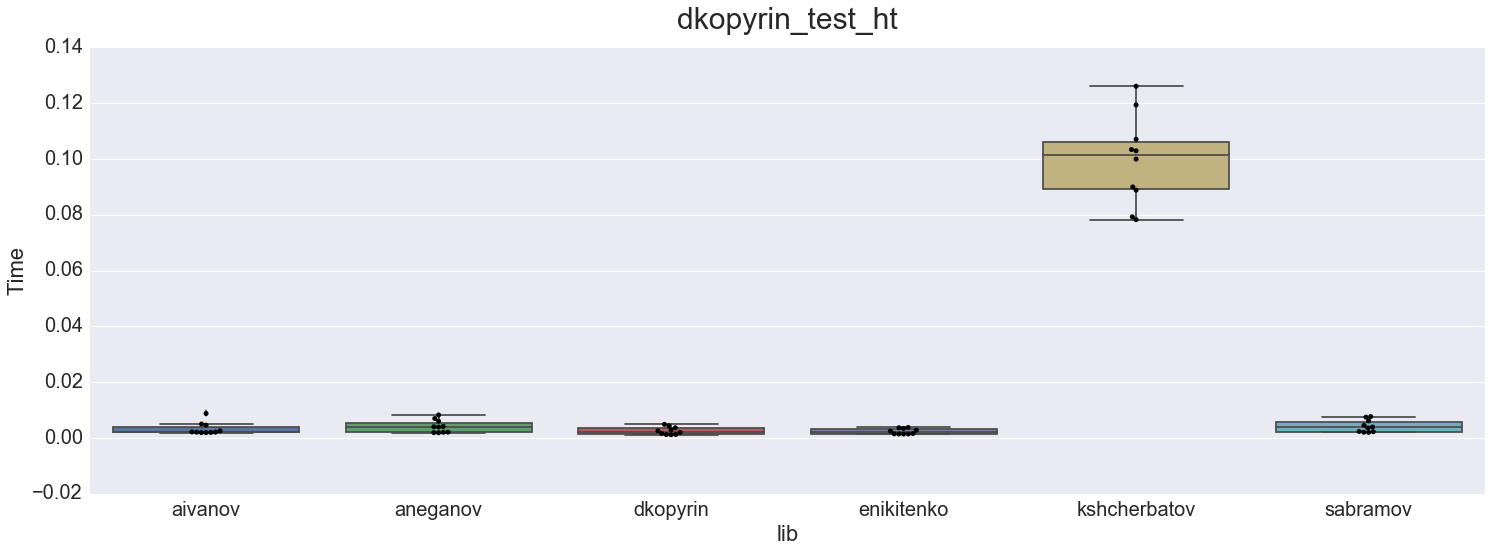

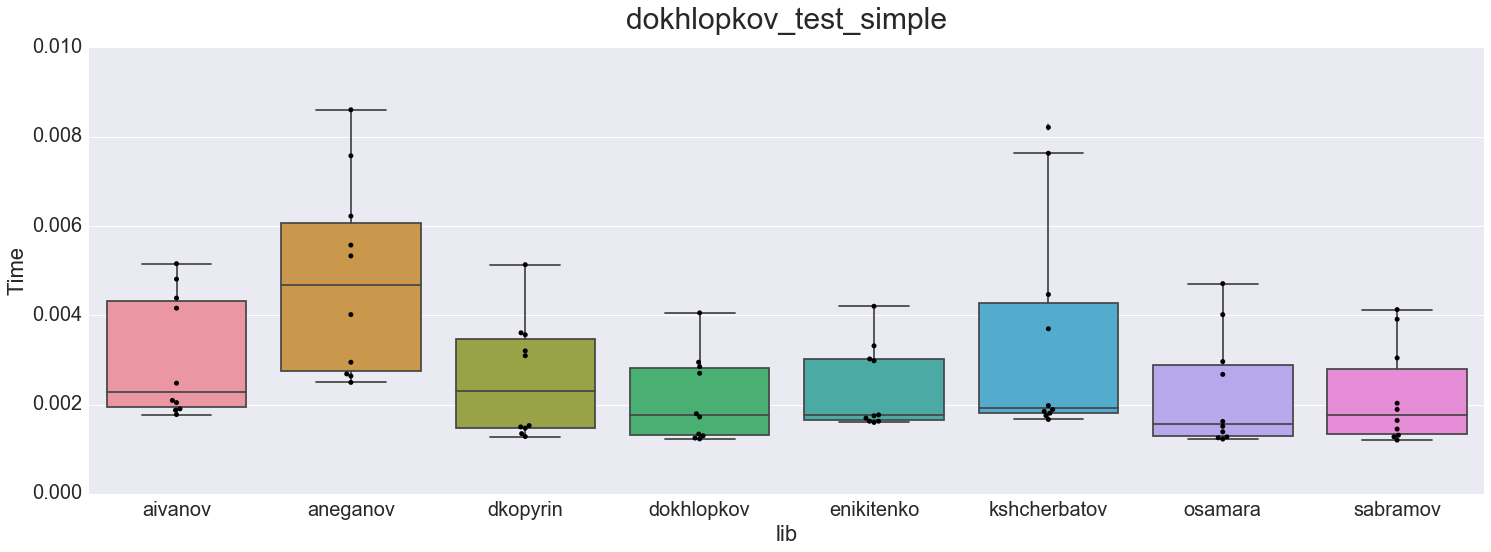

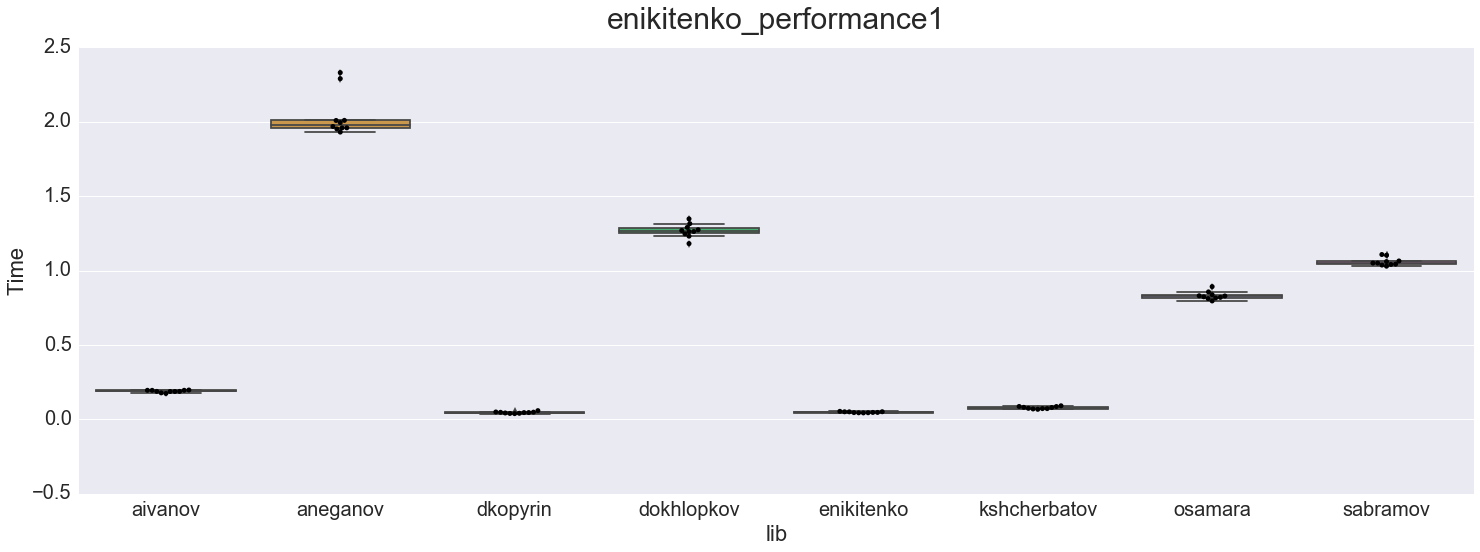

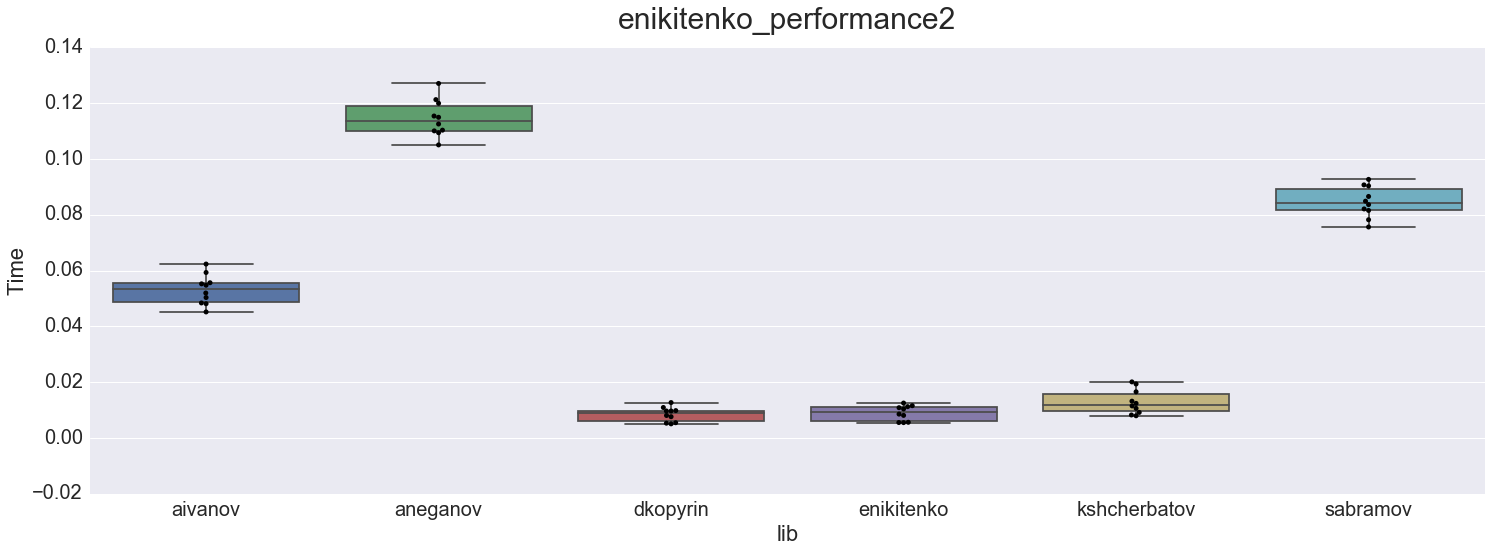

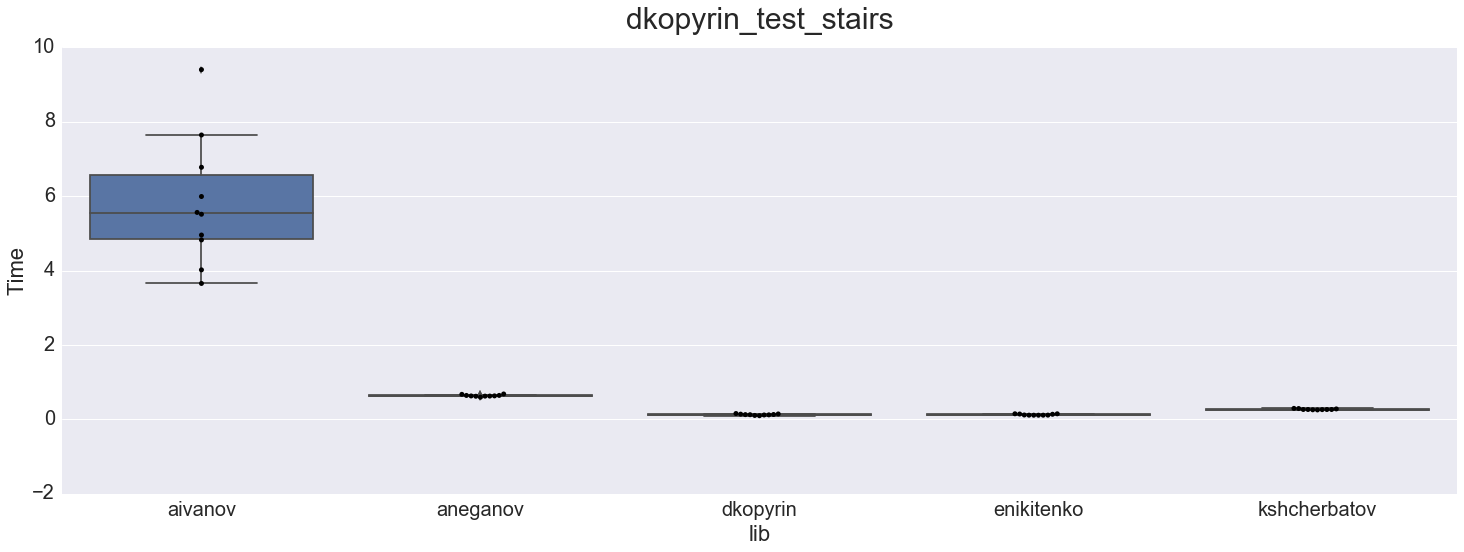

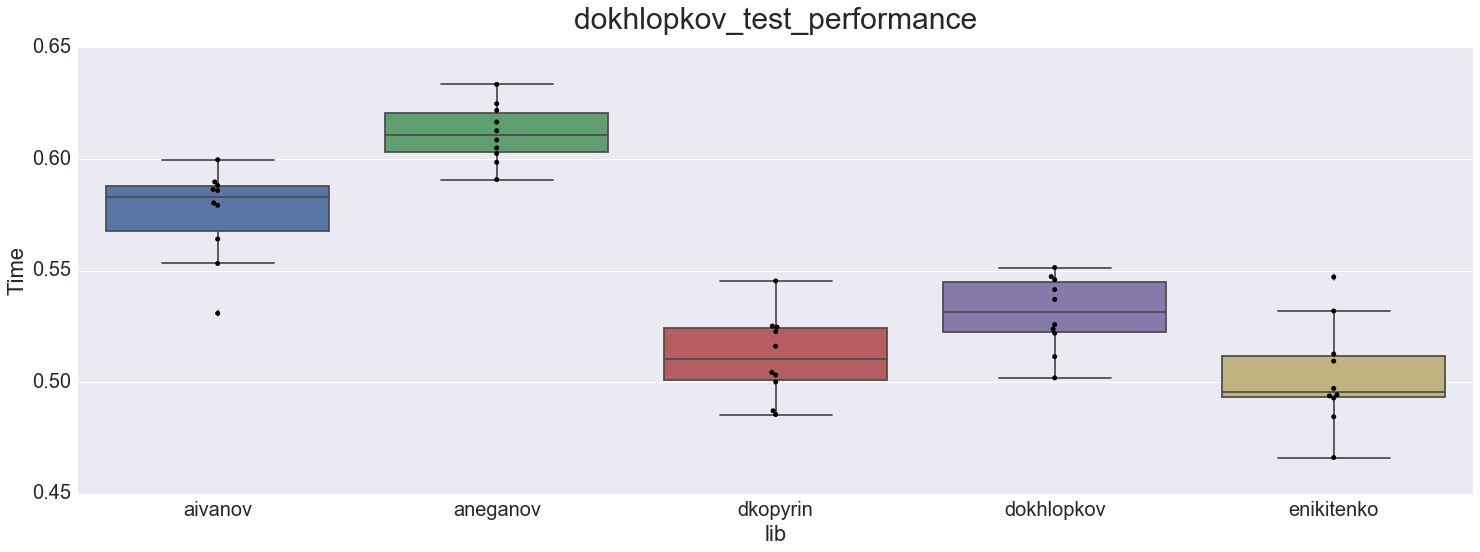

In [14]:
val = passed_data.set_index(passed_data["testid"]).drop(["test", "test_name", "mean", "std", 'testid'], axis=1)
sns.set(font_scale=2)
for test in tests:
    plt.figure(figsize=(25, 8))
    sns.plt.title(test, fontsize=30, y=1.03)
    a = val[val.index == test]
    a = a.set_index(a['lib']).drop(["lib"], axis=1).transpose()
    ax = sns.boxplot(data=a)
    sns.swarmplot(data=a, size=5, ax=ax, color="black")
    plt.ylabel('Time')
    plt.show()

## Raw results 
with mean and std

In [15]:
pd.set_option('display.max_rows', len(data))
data.drop(values, axis=1)

,lib,test,test_name,mean,std,testid
0,aivanov,aivanov,test1,0.215904,0.008765,aivanov_test1
1,aivanov,aivanov,test2,0.718971,0.045586,aivanov_test2
2,aivanov,aneganov,test_func,0.004372,0.002809,aneganov_test_func
3,aivanov,dkopyrin,test_ht,0.003315,0.002233,dkopyrin_test_ht
4,aivanov,dkopyrin,test_ladder,0.123083,0.009318,dkopyrin_test_ladder
5,aivanov,dkopyrin,test_pyramid,-1.000000,0.000000,dkopyrin_test_pyramid
6,aivanov,dkopyrin,test_simple,0.002704,0.001623,dkopyrin_test_simple
7,aivanov,dkopyrin,test_simple_map,0.003009,0.001816,dkopyrin_test_simple_map
8,aivanov,dkopyrin,test_stairs,5.835247,1.730146,dkopyrin_test_stairs
9,aivanov,dokhlopkov,test_performance,0.575768,0.020626,dokhlopkov_test_performance


In [16]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter by dokhlopkov.
</footer>''')